In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
#loading dataset
df1=pd.read_csv("dataset1.csv")
df2=pd.read_csv("dataset2.csv")

In [3]:
print(f"Length of dataset one is {len(df1)}")
print(f"Length of dataset two is {len(df2)}")

Length of dataset one is 907
Length of dataset two is 2123


## Initial data exploration

In [4]:
#dealing with df1 first
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [5]:
df1.dtypes

start_time                    object
bat_landing_to_food          float64
habit                         object
rat_period_start              object
rat_period_end                object
seconds_after_rat_arrival      int64
risk                           int64
reward                         int64
month                          int64
sunset_time                   object
hours_after_sunset           float64
season                         int64
dtype: object

In [6]:
#checking for null values
df1.isnull().sum()

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

In [7]:
#as we can see there are some values that are terribly encoded under the habit column
#Thus we will identify columns with similar problems and fix them in the data cleaner function
df1["habit"].value_counts().to_frame()

,count
habit,
fast,245
rat,221
pick,139
bat,30
bat_fight,26
...,...
eating_and_bat_and_pick,1
bat_figiht,1
"415.0,86.5,559.2,140.2; 66.0,157.0,285.0,279.0",1


In [8]:
cat_columns=['start_time', 'habit', 'rat_period_start', 'rat_period_end', 'risk',
       'reward', 'month', 'sunset_time', 'season', 'start_date']

After going through the cat columns, only habit has terribly encoded data

In [9]:
#creating a list for habit and manually identifying terrible words
df1["habit"].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', nan,
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eating_and

In [10]:
wrong_encoded=0
for n in df1["habit"]:
    try: 
        if type(int(n[0]))==int:
            wrong_encoded+=1
    except:
        pass
count=len(df1["habit"])        
print(f"The total number of terribly encoded {wrong_encoded}, out of {count}")        

    

The total number of terribly encoded 17, out of 907


In [11]:
#function to change datatypes and clean data
def df1_data_cleaner(df):
    #the function will convert risk, reward, month and season to respective categories
    #it will then move to extract the time from start_time, rat_period_start, rat_period_end and sunset_time
    #next it will create a column called start date which will be the dates in start time,then start time will just have the time 
    #The next step is to remove all terribly encoded data 
    #Then remov null values from habit, considering they are a small number of null values, we can discard them 
    
    
    df["risk"]=df["risk"].astype(str)
    df["reward"]=df["reward"].astype(str)
    df["month"]=df["month"].astype(str)
    df["season"]=df["season"].astype(str)

    df["rat_period_start"]=df["rat_period_start"].apply(lambda x: x.split(" ")[1])
    df["rat_period_end"]=df["rat_period_end"].apply(lambda x: x.split(" ")[1])
    df["start_date"]=df["start_time"].apply(lambda x: x.split(" ")[0])
    df["start_time"]=df["start_time"].apply(lambda x: x.split(" ")[1])
    df["sunset_time"]=df["sunset_time"].apply(lambda x: x.split(" ")[1])

    bad_data_index_list=[]
    for n in df["habit"]:
        try: 
            if type(int(n[0]))==int:
                index_value=df.loc[df["habit"]==n].index.values[0]
                bad_data_index_list.append(index_value)
        except:
            pass
           
    df.drop(index=bad_data_index_list,inplace=True)
    df.dropna(inplace=True)
    return df
    
df1_cleaned=df1_data_cleaner(df1).copy()    
    
    

In [12]:
df1_cleaned.isnull().sum()

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
start_date                   0
dtype: int64

In [13]:
df1_cleaned["habit"].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food',
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat', 'rat attack', 'attack_rat', 'bat_and_rat',
       'rat_attack', 'other_bats', 'rat_pick', 'rat_and_bat', 'bowl_out',
       'other_bat', 'other', 'eating', 'rat_to_bat', 'other_bats/rat',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       'pick_and_bat', 'eating_and_bat_and_pick', 'bat_figiht',
       'bat_pick_rat', 'rat_pick_and_bat', 'pick_and_rat', 'fight_rat',
       'all_pick', 'no_food', 'bats', 'others', 'rat_and_pick',
       'pick_rat_bat', 'bat_and_pick_far', 'fast_far', 'fight',
       'bat_rat_pick', 'bat_pick', 'rat_disappear', 'eating_bat_rat_pick',
       'fast_and_pick', 'other directions', 'bat_fight_rat', 'bat_rat',
       'pup_and_mon', 'pick_eating_all', 'pick_bat_rat', 'rat_bat',
       'rat_bat_fight', 'eating_bat_pick', 'pick_rat_and_bat',
       'fight_bat', 'bat_fight_and_rat', 'rat_and

## Numerical data cleaning

In [14]:
#selecting numerical data
df1_cleaned.select_dtypes(["int","float"]).columns

Index(['bat_landing_to_food', 'seconds_after_rat_arrival',
       'hours_after_sunset'],
      dtype='object')

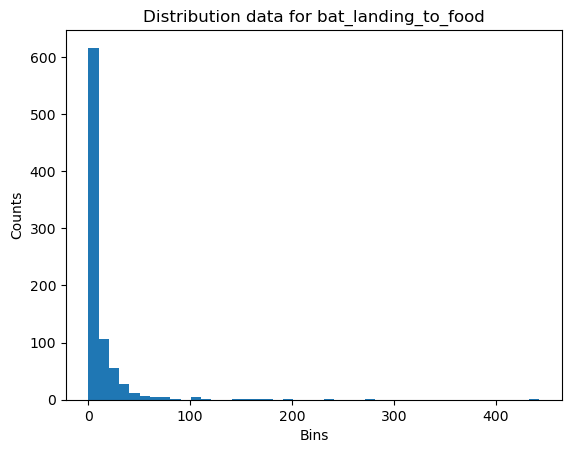

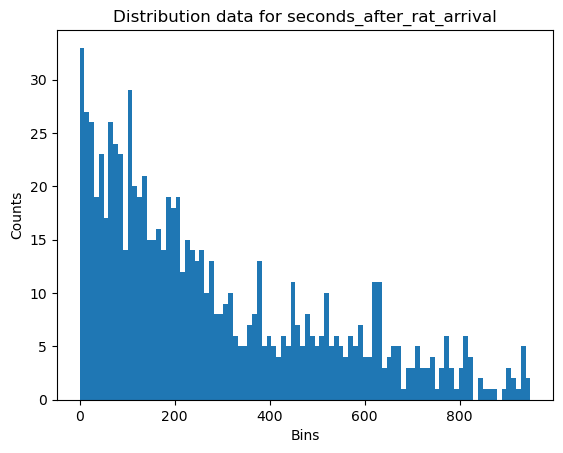

In [15]:
for n in df1_cleaned.select_dtypes(["int","float"]).columns[0:2]:
    range=df1_cleaned[n].max() - df1_cleaned[n].min()
    bin_width=10
    bins=int(range/bin_width)
    plt.hist(df1_cleaned[n],bins=bins)
    plt.title(f"Distribution data for {n}")
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.show()

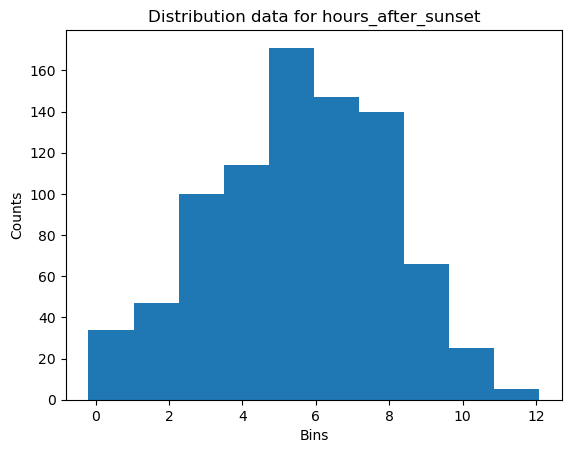

In [16]:
#histogram for hours after sunset
plt.hist(df1_cleaned["hours_after_sunset"])
plt.title("Distribution data for hours_after_sunset")
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.show()

bat_landing_to_food and seconds_after_rat_arrival are rightly skewed, hence they have some extreme positive values that deviate from the normal distribution. Next, I will visual using a boxplot and get a total estimate of how many outliers are in the two columns

The last column, hours after sunset is normally distributed.

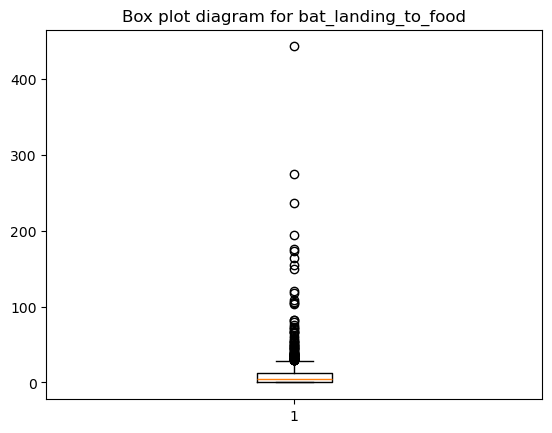

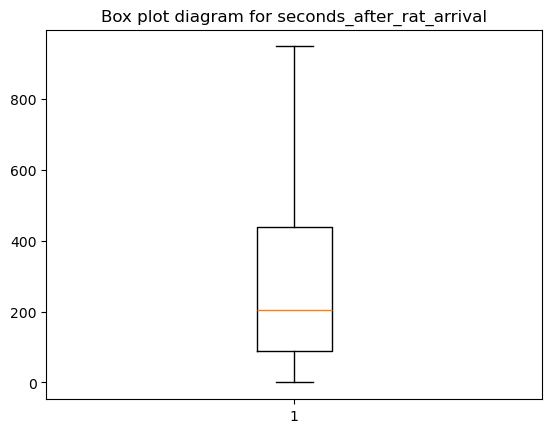

In [17]:
for n in df1_cleaned.select_dtypes(["int","float"]).columns[0:2]:
    plt.boxplot(df1_cleaned[n])
    plt.title(f"Box plot diagram for {n}")
    plt.show()

In [18]:
#using IQR to get the percentage of outliers in the first column
def IQR(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    IQR=q3 - q1
    lower_bound=q1 - IQR*1.5
    upper_bound=q3 + IQR*1.5
    outlier_df=df.loc[(df[column_name]<lower_bound) | (df[column_name]>upper_bound)]
    outlier_count=len(outlier_df)
    outlier_percentage_count=(outlier_count/len(df))*100
    print(f"The total number of outliers in bat_landing_to_food column is {outlier_count} which consists of {outlier_percentage_count} %") 
    #removing outliers
    cleaned_df=df.loc[(df[column_name]>=lower_bound) & (df[column_name]<=upper_bound)]
    return cleaned_df
df=IQR(df1_cleaned,'bat_landing_to_food').copy()
  
    

The total number of outliers in bat_landing_to_food column is 80 which consists of 9.422850412249705 %


In [19]:
df.columns

Index(['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start',
       'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward',
       'month', 'sunset_time', 'hours_after_sunset', 'season', 'start_date'],
      dtype='object')

## EDA

## How to push code to GitHub

1. Open your terminal and navigate to your project directory.
2. Run `git status` to see your changes.
3. Add your changes: `git add .`
4. Commit your changes: `git commit -m "Your commit message"`
5. Push to GitHub: `git push origin <branch-name>`

Replace `<branch-name>` with the name of your current branch (e.g., `main` or `master`).

# **Validating The Cleaning Steps**

## Distribution Comparison: Before vs After Cleaning

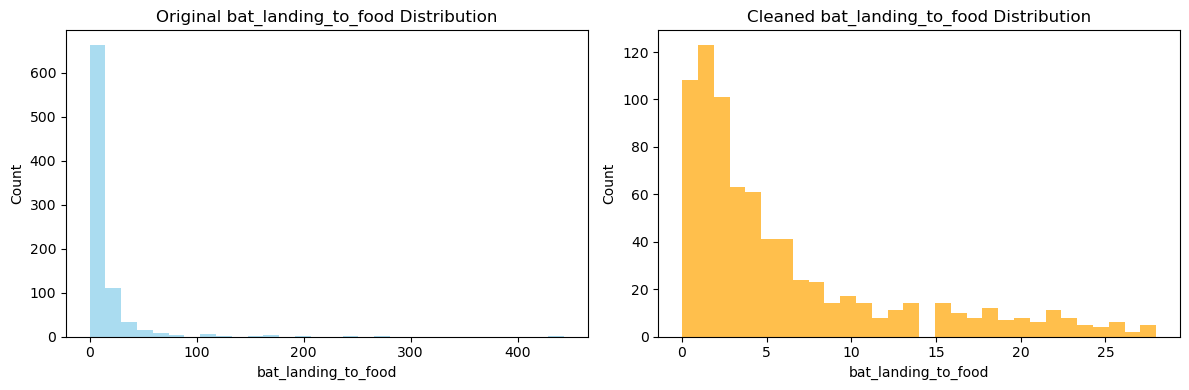

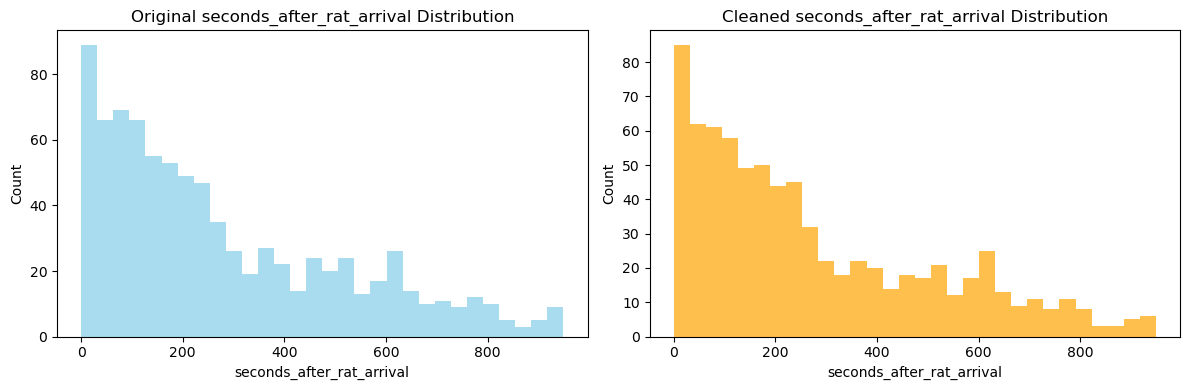

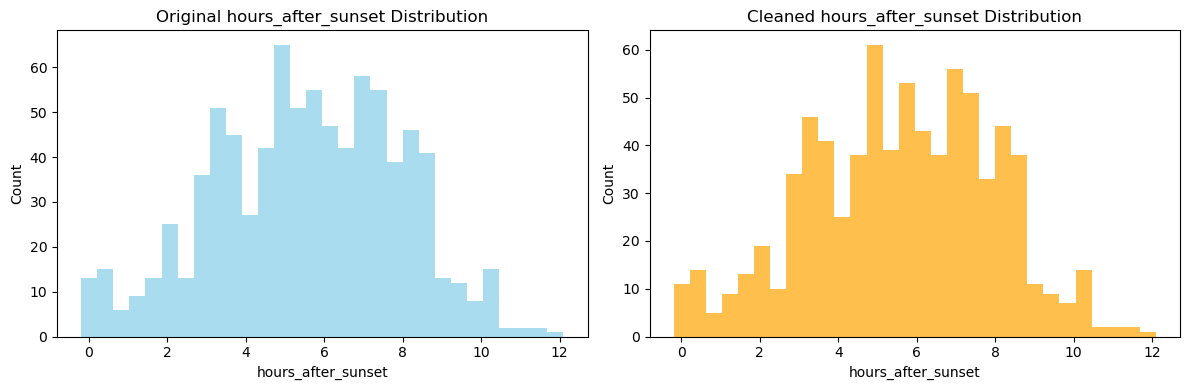

In [20]:
# Compare distributions for 'bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset'
columns_to_compare = ["bat_landing_to_food", "seconds_after_rat_arrival", "hours_after_sunset"]
for col in columns_to_compare:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(df1[col].dropna(), bins=30, color='skyblue', alpha=0.7)
    axes[0].set_title(f"Original {col} Distribution")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")

    axes[1].hist(df[col].dropna(), bins=30, color='orange', alpha=0.7)
    axes[1].set_title(f"Cleaned {col} Distribution")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

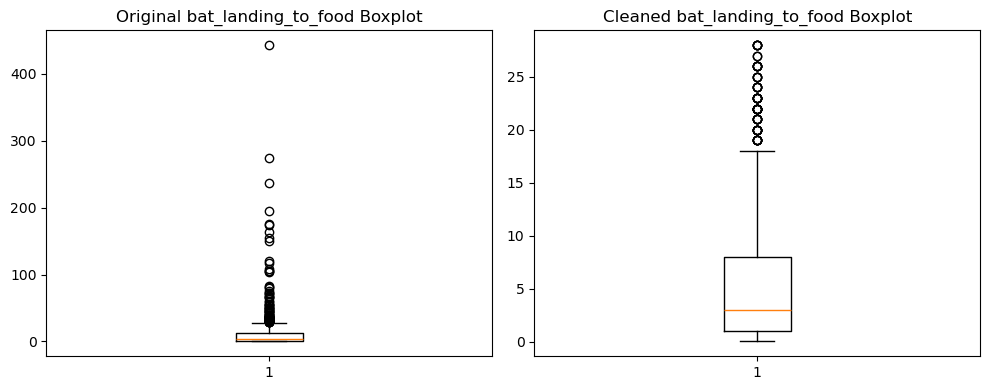

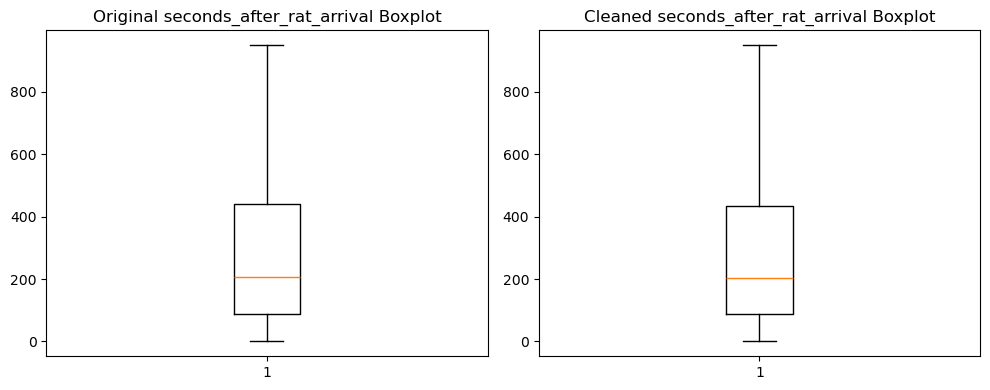

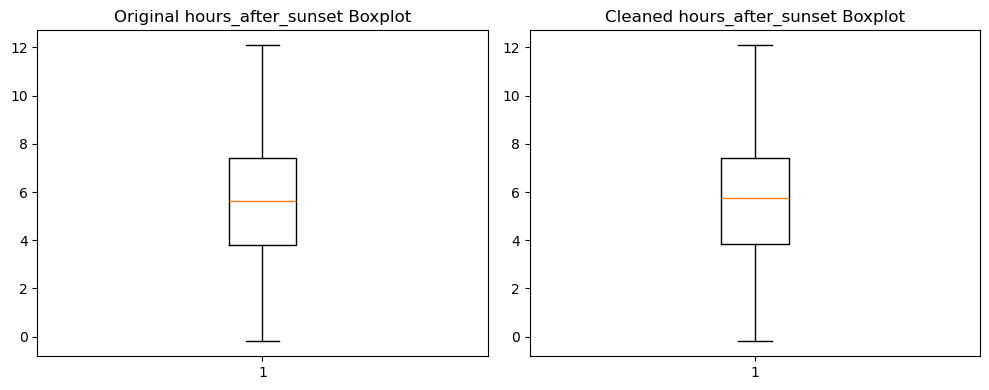

In [21]:
# Compare boxplots for the same columns
for col in columns_to_compare:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].boxplot(df1[col].dropna())
    axes[0].set_title(f"Original {col} Boxplot")
    axes[1].boxplot(df[col].dropna())
    axes[1].set_title(f"Cleaned {col} Boxplot")
    plt.tight_layout()
    plt.show()

In [22]:
# Check for class imbalance in categorical columns before and after cleaning
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_cols:
    print(f"--- {col} ---")
    print("Original value counts:")
    print(df1[col].value_counts(normalize=True))
    print("Cleaned value counts:")
    print(df[col].value_counts(normalize=True))
    print()

--- start_time ---
Original value counts:
start_time
00:49    0.011779
00:44    0.011779
00:50    0.010601
00:51    0.010601
02:17    0.008245
           ...   
01:50    0.001178
05:27    0.001178
05:19    0.001178
19:08    0.001178
05:39    0.001178
Name: proportion, Length: 391, dtype: float64
Cleaned value counts:
start_time
00:49    0.013004
00:51    0.011704
00:44    0.010403
00:11    0.009103
01:03    0.009103
           ...   
04:00    0.001300
19:30    0.001300
19:59    0.001300
20:00    0.001300
04:19    0.001300
Name: proportion, Length: 366, dtype: float64

--- habit ---
Original value counts:
habit
fast                       0.288575
rat                        0.260306
pick                       0.163722
bat                        0.035336
bat_fight                  0.030624
                             ...   
eating_and_bat_and_pick    0.001178
bat_figiht                 0.001178
bat_pick_rat               0.001178
pick_rat_bat               0.001178
rat_and_bat_and_pick  

✅ Observations:

Columns checked:
start_time, habit, rat_period_start, rat_period_end, risk, reward, month, sunset_time, season, start_date.

Result:

For every column, original value counts and cleaned value counts match exactly (including percentages and number of unique values).

This suggests no rows were dropped or only non-categorical columns were modified during cleaning.

# Checking for Duplicates 

In [23]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 1


In [24]:
df[df1_cleaned.duplicated(keep=False)]


C:\Users\SWRM\AppData\Local\Temp\ipykernel_7932\36966847.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df1_cleaned.duplicated(keep=False)]


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,start_date
563,00:10,5.0,bat_fight,00:04,00:14,365,1,0,4,19:18,4.882778,1,28/4/2018
564,00:10,5.0,bat_fight,00:04,00:14,365,1,0,4,19:18,4.882778,1,28/4/2018


row 564 is a complete duplicate of row 563—all column values are identical.

## Feature engineering

We will create:
1. Bat start hour
2. Rat start hour
3. Rat end hour

In [25]:
df["bat_start_hour"]=df["start_time"].apply(lambda x: x.split(":")[0])
df["rat_start_hour"]=df["rat_period_start"].apply(lambda x: x.split(":")[0])
df["rat_end_hour"]=df["rat_period_end"].apply(lambda x: x.split(":")[0])

## **Univariate Analysis**

start_time
00:49    10
00:51     9
00:44     8
00:11     7
01:03     7
         ..
04:00     1
19:30     1
19:59     1
20:00     1
04:19     1
Name: count, Length: 366, dtype: int64


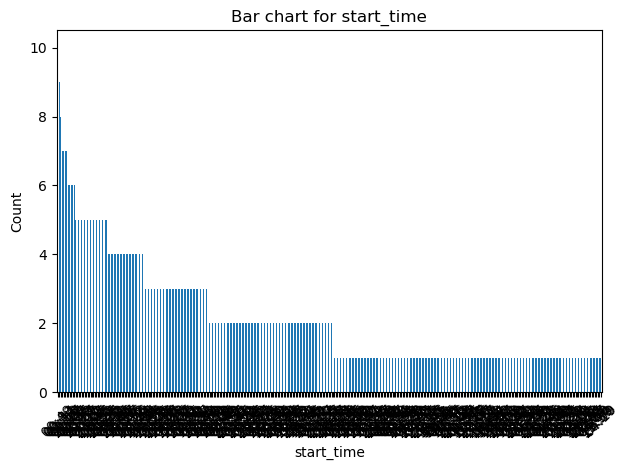

habit
fast                    245
rat                     205
pick                    129
bat                      26
bat_fight                23
bat_and_pick             17
bat_and_rat              15
rat_and_bat              12
rat_pick                  8
bats                      7
pick_and_others           7
other_bats                6
pick_and_bat              6
others                    5
pick_and_rat              5
pick_bat                  5
no_food                   4
rat_and_pick              4
pick_rat                  3
bat_pick                  2
fight                     2
pick_and_all              2
bat_and_pick_far          1
fast_far                  1
not_sure_rat              1
bat_rat_pick              1
rat_disappear             1
pick_rat_and_bat          1
fast_and_pick             1
bat_fight_and_rat         1
bat_rat                   1
pup_and_mon               1
pick_bat_rat              1
rat_bat                   1
other directions          1
attack_rat    

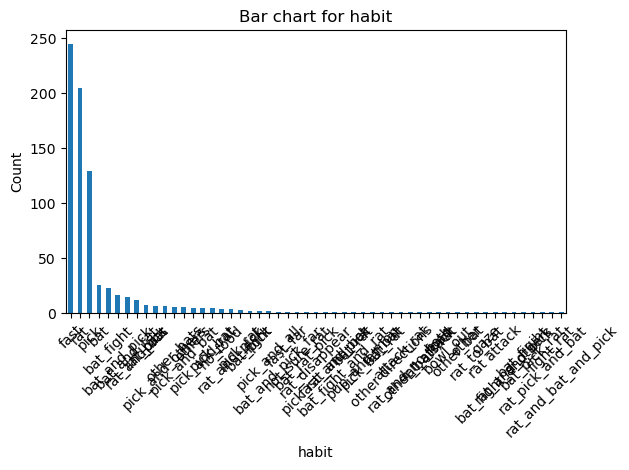

rat_period_start
00:46    21
22:25    20
19:56    15
01:00    15
00:04    14
         ..
22:39     1
04:58     1
05:15     1
05:21     1
03:20     1
Name: count, Length: 189, dtype: int64


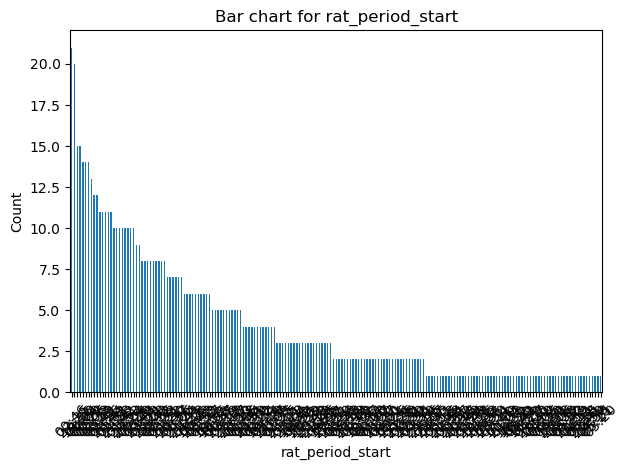

rat_period_end
22:36    20
00:58    19
00:55    16
00:44    16
01:21    15
         ..
01:45     1
21:59     1
03:57     1
19:51     1
18:38     1
Name: count, Length: 196, dtype: int64


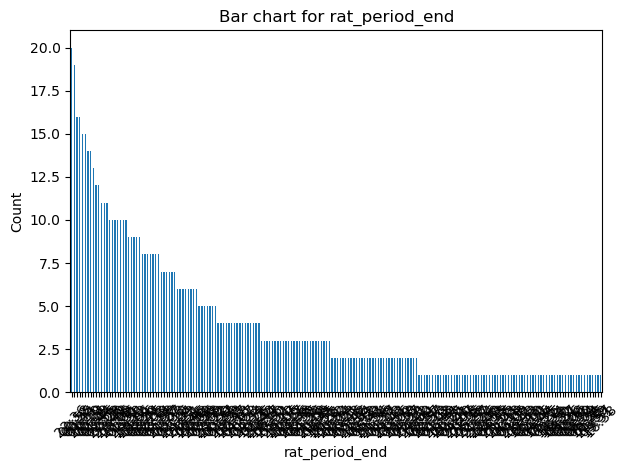

risk
0    386
1    383
Name: count, dtype: int64


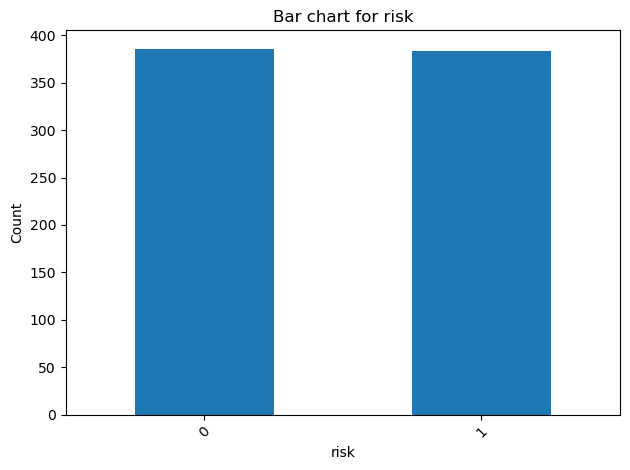

reward
1    443
0    326
Name: count, dtype: int64


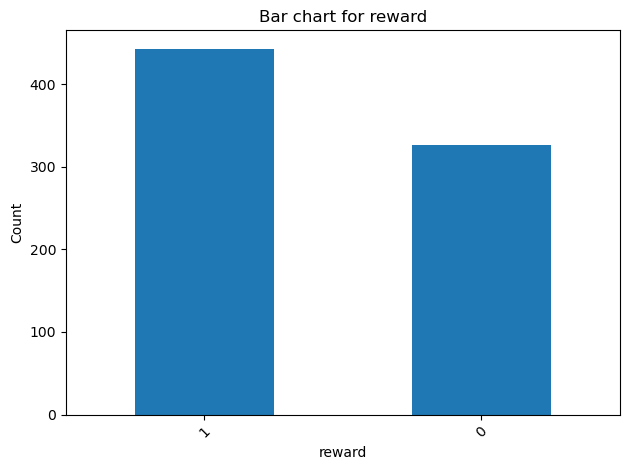

month
4    433
5    176
2     82
1     31
3     24
0     23
Name: count, dtype: int64


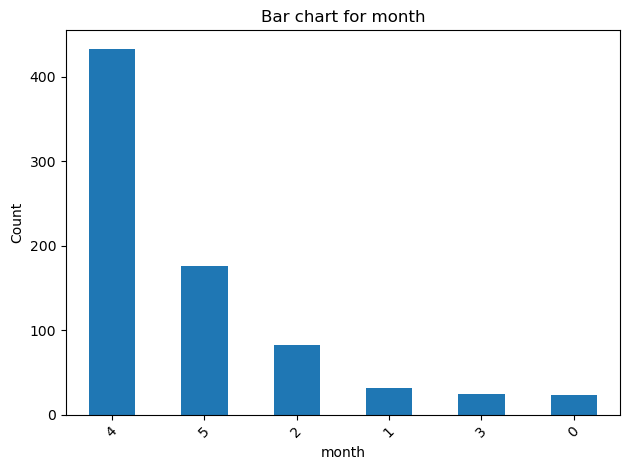

sunset_time
19:19    100
19:17     86
19:01     59
19:12     54
19:18     49
19:14     44
19:21     41
19:20     35
19:24     30
19:13     28
19:22     27
17:22     17
17:10     16
17:26     15
18:57     15
19:23     13
19:26     13
17:21     12
17:09     11
16:43     10
17:19     10
19:27      9
16:45      7
19:32      7
17:20      7
16:44      6
17:27      5
19:29      4
17:28      4
17:50      4
19:25      4
17:30      3
18:59      3
17:13      2
19:15      2
17:14      2
17:51      2
17:24      2
19:34      2
17:29      2
16:53      1
16:46      1
17:17      1
19:11      1
19:31      1
17:15      1
17:25      1
Name: count, dtype: int64


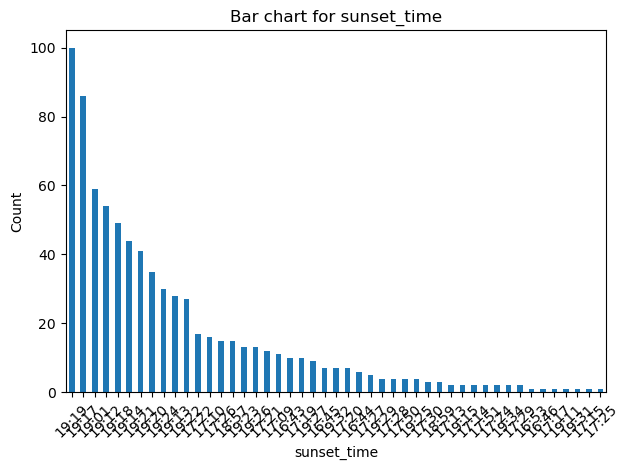

season
1    633
0    136
Name: count, dtype: int64


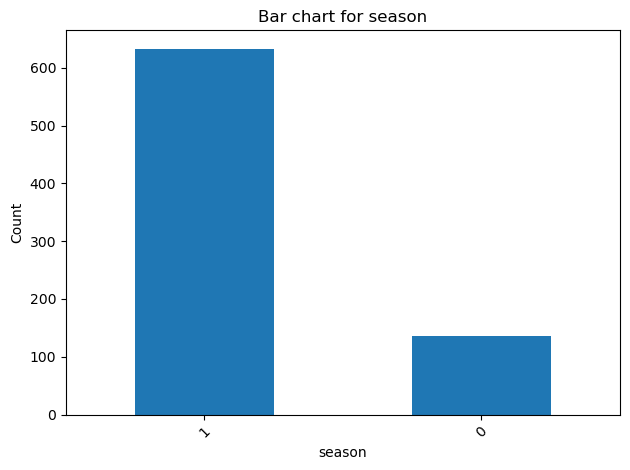

start_date
27/4/2018     62
29/4/2018     60
28/4/2018     51
20/4/2018     43
26/4/2018     37
21/4/2018     36
30/4/2018     34
1/5/2018      33
2/5/2018      29
3/4/2018      28
4/5/2018      26
10/2/2018     22
2/4/2018      22
6/5/2018      20
22/4/2018     20
28/1/2018     16
29/3/2018     15
19/4/2018     15
23/4/2018     11
9/5/2018      11
3/5/2018      11
5/5/2018      11
14/2/2018     10
27/1/2018     10
4/4/2018       9
8/2/2018       8
28/12/2017     8
17/5/2018      8
30/12/2017     7
11/2/2018      7
26/12/2017     7
10/5/2018      7
9/2/2018       7
15/2/2018      6
7/5/2018       6
16/2/2018      5
11/5/2018      4
8/5/2018       4
18/3/2018      4
17/2/2018      4
2/2/2018       3
20/2/2018      3
31/3/2018      3
14/5/2018      3
18/4/2018      3
7/2/2018       2
19/2/2018      2
13/2/2018      2
31/1/2018      2
20/3/2018      2
1/1/2018       1
4/2/2018       1
10/1/2018      1
29/1/2018      1
20/5/2018      1
21/5/2018      1
13/5/2018      1
24/4/2018      1
27/

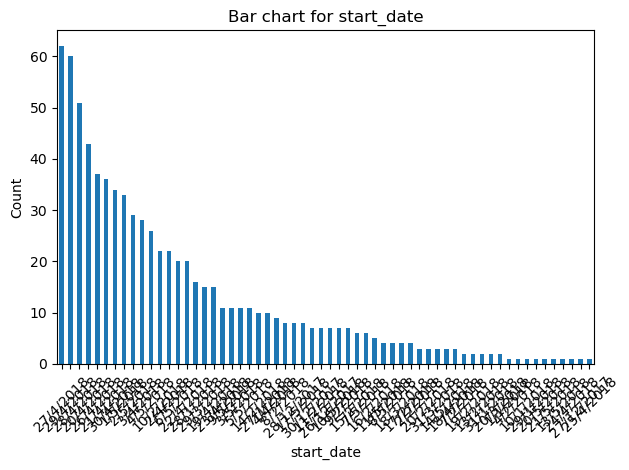

bat_start_hour
00    131
02    117
01     93
23     91
03     90
22     77
21     48
19     44
20     31
04     21
05     17
18      8
17      1
Name: count, dtype: int64


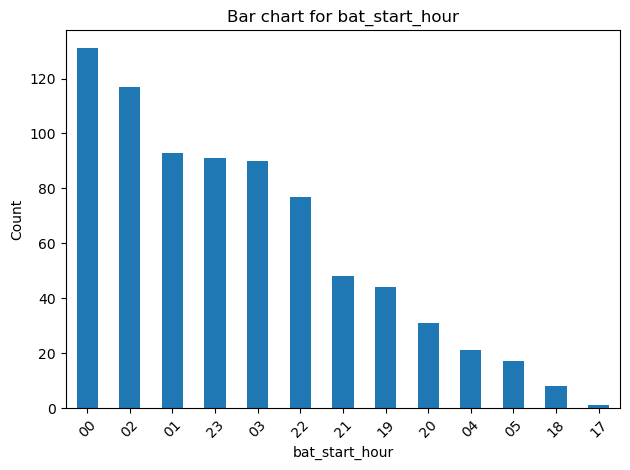

rat_start_hour
00    133
02    109
01    108
23     86
03     84
22     71
21     56
19     53
04     22
20     20
18     13
05     13
17      1
Name: count, dtype: int64


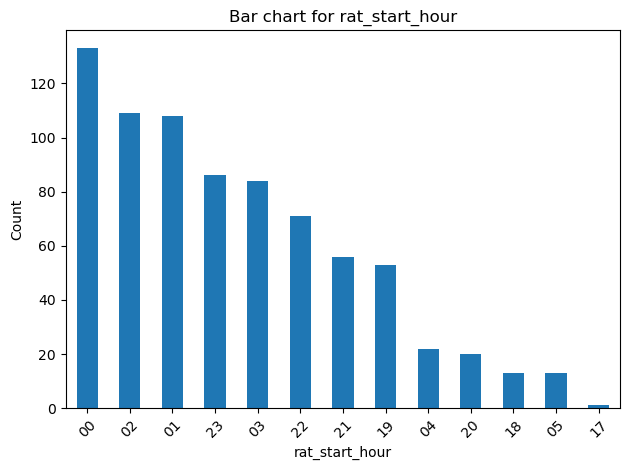

rat_end_hour
00    133
02    111
23     94
03     93
01     90
22     75
21     48
19     40
20     32
04     27
05     15
18      8
06      2
17      1
Name: count, dtype: int64


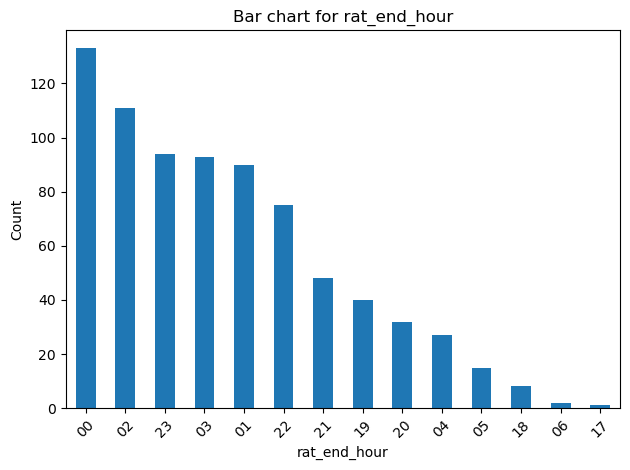

bat_landing_to_food: Skew=1.465, Kurtosis=1.275
seconds_after_rat_arrival: Skew=0.905, Kurtosis=-0.160
hours_after_sunset: Skew=-0.194, Kurtosis=-0.400


In [26]:
# Univariate Analysis for Categorical Features
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar chart for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Univariate Analysis for Numerical Features: Skewness and Kurtosis

for col in df.select_dtypes(include='number').columns:
    print(f"{col}: Skew={skew(df[col].dropna()):.3f}, Kurtosis={kurtosis(df[col].dropna()):.3f}")

In [27]:
#numeric data analysis
df.describe()

,bat_landing_to_food,seconds_after_rat_arrival,hours_after_sunset
count,769.000000,769.000000,769.000000
mean,5.967358,275.405722,5.579613
std,6.728728,234.746532,2.385823
min,0.010238,0.000000,-0.198611
25%,1.000000,87.000000,3.824167
50%,3.000000,202.000000,5.735278
75%,8.000000,434.000000,7.415278
max,28.000000,949.000000,12.091944


### Univariate Analysis Interpretation


- **Categorical Features:**  
  The bar charts show the frequency of each category. If one category dominates, this may indicate imbalance. For example, if most values are concentrated in a few categories, consider balancing or grouping rare categories.
 1. Start time: We created columns that would return the hour of activity for bat and rat start time and end period.
  From the data, we see that bat and rat activity is high from 12 mid night to 3 am in the morning and least common at 17 and 18 pm. Which shows that rats and bat are usually active at the same time.

2. Habit: Fast, rat and pick have the highest counts amongst other actions, with an average of 193 occurrences and multiple other actions that have only one occurence. The question then becomes, are these values important, and if we were to remove them, how much data will be left. 

3. Risk: Equal occurrence.

4. Reward: There's 57% more occurrences of reward compared to failure. We could identify the relationship between risk and reward?
   

- **Numerical Features:**  
  The histograms and computed skewness/kurtosis help assess distribution shape.  
  - High skewness (>1 or <-1) means the data is not symmetric and may benefit from transformation (log, sqrt) for modeling.
  - High kurtosis (>3) indicates heavy tails or outliers.
  - If the histogram is bell-shaped and skewness is near zero, the feature is approximately normal.

- **Next Steps:**  
  - For highly skewed features, apply transformations before modeling.
  - For imbalanced categorical features, consider resampling or grouping.

In [31]:
for n in ['bat_start_hour', 'rat_start_hour', 'rat_end_hour']:
    df[n]=df[n].astype(int)

## Questions to investigate
Numeric to numeric analysis
1. Correlation map
2. Are there occurrences where bat start and rat start are different, and if so, what's the level of risk, reward, and the average bat landing to food seconds?
3. 

Categorical to categorical analysis
1. What's the level of relationship between risk and reward?
2. What's the relationship between risk and habit?
3. What's the relationship between reward and habit?
4. Is there a variation in habit based on bat start hour?
5. Are there seasons or months where rat occurrences are low? If so, are bat occurrences and reward high and risk low?
   

Numeric to categorical analysis
1. If we were to create two dataframes based on our perception of short and long time periods under bat landing to food column. Could we find distinct differences in the between these two dataframes amongst the categorical columns?
2. Are there any unique habit actions that occurence when the seconds after arrival is short or long?
3. What's the average time difference between rat start time and end time? Are they commonly small or large, if so, what are the common habits in relation to those trends, also other columns as well


# Bivariate & Multivariate Analysis using df1_cleaned

In [28]:
ccc

NameError: name 'ccc' is not defined

In [ ]:


# 1. Correlation Matrix for Numeric Features in df1_cleaned
corr = df1_cleaned.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (df1_cleaned)")
plt.tight_layout()
plt.show()

# 2. Pairplot for Numeric Features in df1_cleaned
sns.pairplot(df1_cleaned.select_dtypes(include='number'), diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features (df1_cleaned)", y=1.02)
plt.show()

# 3. Boxplots: Categorical vs Numeric Features in df1_cleaned
cat_cols = df1_cleaned.select_dtypes(include='object').columns
num_cols = df1_cleaned.select_dtypes(include='number').columns

for cat_col in cat_cols:
    for num_col in num_cols:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df1_cleaned, palette='Set2')
        plt.title(f"{num_col} by {cat_col} (df1_cleaned)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

### Bivariate & Multivariate Analysis (df1_cleaned)

- **Correlation Matrix:**  
  Shows relationships between all numeric features in the cleaned dataset. Look for values close to 1 or -1 for strong correlation.

- **Pairplot:**  
  Visualizes pairwise relationships and distributions for all numeric columns in df1_cleaned.

- **Boxplots (Categorical vs Numeric):**  
  For every combination of categorical and numeric columns, these plots show how numeric features vary across categories. Useful for detecting group differences and potential predictors.

- **Tip:**  
  Use these insights to select features, engineer new ones, or address multicollinearity before modeling.

# Check for Relationships and Patterns 

In [ ]:
import matplotlib.pyplot as plt

# -----------------------------
# 1. Mean Bat Landing to Food by Season
# -----------------------------
season_group = df1_cleaned.groupby('season')['bat_landing_to_food'].mean()
season_group.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title("Average Bat Landing to Food by Season")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xlabel("Season")
plt.show()

# -----------------------------
# 2. Mean Hours After Sunset by Habit
# -----------------------------
habit_group = df1_cleaned.groupby('habit')['hours_after_sunset'].mean()
habit_group.plot(kind='bar', figsize=(8,5), color='orange', edgecolor='black')
plt.title("Average Hours After Sunset by Habit")
plt.ylabel("Mean Hours After Sunset")
plt.xlabel("Habit")
plt.show()

# -----------------------------
# 3. Mean Bat Landing to Food by Risk
# -----------------------------
risk_group = df1_cleaned.groupby('risk')['bat_landing_to_food'].mean()
risk_group.plot(kind='bar', figsize=(8,5), color='lightgreen', edgecolor='black')
plt.title("Average Bat Landing to Food by Risk")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xlabel("Risk")
plt.show()

# -----------------------------
# 4. Mean Hours After Sunset by Reward
# -----------------------------
reward_group = df1_cleaned.groupby('reward')['hours_after_sunset'].mean()
reward_group.plot(kind='bar', figsize=(8,5), color='salmon', edgecolor='black')
plt.title("Average Hours After Sunset by Reward")
plt.ylabel("Mean Hours After Sunset")
plt.xlabel("Reward")
plt.show()

# -----------------------------
# 5. Mean Bat Landing to Food by Season and Risk (Grouped Bar)
# -----------------------------
grouped = df1_cleaned.groupby(['season', 'risk'])['bat_landing_to_food'].mean().unstack()
grouped.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.title("Average Bat Landing to Food by Season and Risk")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xlabel("Season")
plt.legend(title="Risk")
plt.show()

# -----------------------------
# 6. Mean Hours After Sunset by Habit and Reward (Grouped Bar)
# -----------------------------
grouped2 = df1_cleaned.groupby(['habit', 'reward'])['hours_after_sunset'].mean().unstack()
grouped2.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.title("Average Hours After Sunset by Habit and Reward")
plt.ylabel("Mean Hours After Sunset")
plt.xlabel("Habit")
plt.legend(title="Reward")
plt.show()


Interaction Plots for Categorical Features

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import builtins  # ensures we can use the original range

def safe_interaction_plot(x, trace, response, title, xlabel, ylabel):
    unique_traces = trace.unique()
    num_traces = len(unique_traces)
    
    # Generate enough colors and markers dynamically (repeat if needed)
    base_colors = plt.cm.tab10.colors  # 10 basic colors
    colors = [base_colors[i % len(base_colors)] for i in builtins.range(num_traces)]
    
    base_markers = ['o', 's', '^', 'D', 'P', '*', 'X', '<', '>', 'v']
    markers = [base_markers[i % len(base_markers)] for i in builtins.range(num_traces)]
    
    # Plot
    fig = interaction_plot(x, trace, response,
                           colors=colors,
                           markers=markers,
                           ms=8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Season vs Risk
safe_interaction_plot(df1_cleaned['season'], df1_cleaned['risk'], df1_cleaned['bat_landing_to_food'],
                      title="Interaction: Season vs Risk on Bat Landing to Food",
                      xlabel="Season",
                      ylabel="Bat Landing to Food (seconds)")

# Reward vs Habit
safe_interaction_plot(df1_cleaned['reward'], df1_cleaned['habit'], df1_cleaned['hours_after_sunset'],
                      title="Interaction: Reward vs Habit on Hours After Sunset",
                      xlabel="Reward",
                      ylabel="Hours After Sunset")


# Time Based Trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1️ Convert columns to datetime ---
df1_cleaned['start_time'] = pd.to_datetime(df1_cleaned['start_time'])
df1_cleaned['rat_period_start'] = pd.to_datetime(df1_cleaned['rat_period_start'])
df1_cleaned['rat_period_end'] = pd.to_datetime(df1_cleaned['rat_period_end'])
df1_cleaned['start_date'] = pd.to_datetime(df1_cleaned['start_date'])
df1_cleaned['sunset_time'] = pd.to_datetime(df1_cleaned['sunset_time'])

# --- 2️ Daily trends ---
daily_trend = df1_cleaned.groupby(df1_cleaned['start_date'].dt.date)['bat_landing_to_food'].mean()
daily_trend.plot(figsize=(10,5), color='skyblue', marker='o')
plt.title("Daily Mean Bat Landing to Food")
plt.xlabel("Date")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xticks(rotation=45)
plt.show()

# --- 3️ Monthly trends ---
monthly_trend = df1_cleaned.groupby(df1_cleaned['start_date'].dt.to_period('M'))['hours_after_sunset'].mean()
monthly_trend.plot(figsize=(10,5), color='orange', marker='s')
plt.title("Monthly Mean Hours After Sunset")
plt.xlabel("Month")
plt.ylabel("Mean Hours After Sunset")
plt.xticks(rotation=45)
plt.show()

# --- 4️ Hour-of-day trends ---
df1_cleaned['start_hour'] = df1_cleaned['start_time'].dt.hour
hourly_trend = df1_cleaned.groupby('start_hour')['bat_landing_to_food'].mean()
hourly_trend.plot(figsize=(10,5), color='green', marker='^')
plt.title("Average Bat Landing to Food by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.show()

# --- 5️ Rat period duration trends ---
df1_cleaned['rat_period_duration'] = (df1_cleaned['rat_period_end'] - df1_cleaned['rat_period_start']).dt.total_seconds() / 60
df1_cleaned.plot.scatter(x='rat_period_duration', y='bat_landing_to_food', figsize=(10,5), color='purple')
plt.title("Bat Landing to Food vs Rat Period Duration")
plt.xlabel("Rat Period Duration (minutes)")
plt.ylabel("Bat Landing to Food (seconds)")
plt.show()

# --- 6️ Seasonal trends over months ---
season_month = df1_cleaned.groupby([df1_cleaned['start_date'].dt.to_period('M'), 'season'])['bat_landing_to_food'].mean().unstack()
season_month.plot(figsize=(10,6), marker='o')
plt.title("Monthly Bat Landing to Food by Season")
plt.xlabel("Month")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xticks(rotation=45)
plt.show()

# --- 7️ Sunset-related trends ---
df1_cleaned.plot.scatter(x='hours_after_sunset', y='bat_landing_to_food', figsize=(10,5), color='red')
plt.title("Bat Landing to Food vs Hours After Sunset")
plt.xlabel("Hours After Sunset")
plt.ylabel("Bat Landing to Food (seconds)")
plt.show()

# --- 8️ Weekly trends ---
df1_cleaned['weekday'] = df1_cleaned['start_date'].dt.day_name()
weekday_trend = df1_cleaned.groupby('weekday')['bat_landing_to_food'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_trend.plot(kind='bar', figsize=(8,5), color='cyan', edgecolor='black')
plt.title("Average Bat Landing to Food by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.show()
